<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220803_%EB%8C%80%EC%B6%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Personal Loan Modeling
#### Predict whether a customer will respond to a Personal Loan Campaign!
#### 부채고객을 개인 대출 고객으로 전환하기위한 최소한의 예산으로 마케팅
### 과제 : 로지스틱 회귀, KNN, SVM, Dicision Tree

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [3]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d teertha/personal-loan-modeling

  0% 0.00/60.6k [00:00<?, ?B/s]
100% 60.6k/60.6k [00:00<00:00, 27.9MB/s]


In [4]:
!unzip '*.zip' -d/content

Archive:  personal-loan-modeling.zip
  inflating: /content/Bank_Personal_Loan_Modelling.csv  


In [88]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

In [ ]:
df.describe()

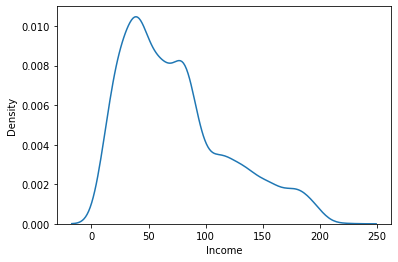

In [17]:
sns.kdeplot(x=df['Income'])

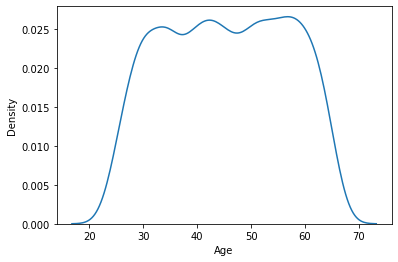

In [18]:
sns.kdeplot(x=df['Age'])

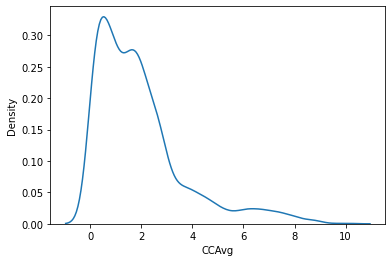

In [19]:
sns.kdeplot(x=df['CCAvg'])

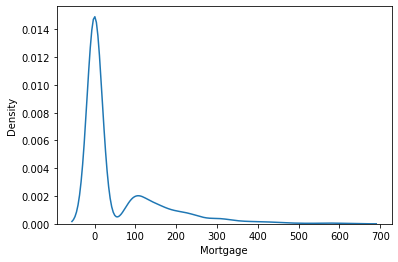

In [20]:
sns.kdeplot(x=df['Mortgage'])

In [90]:
# 분석에 활용할 열을 선택
ndf = df[['Age','Experience','Income',
           'Family','CCAvg','Education','Mortgage',
          'Personal Loan','Securities Account','CD Account','Online','CreditCard']]
ndf.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [91]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [92]:
category_cols = ['Education','Family','Personal Loan',
    'Securities Account','CD Account','Online','CreditCard','Experience']

In [93]:
for col in category_cols: # 판다스에서제공하는 category 자료형으로 변경
  df[col] = df[col].astype('category') # 반복문을 통해 타입 변경

df.dtypes

ID                       int64
Age                      int64
Experience            category
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   category
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 275.9 KB


In [95]:
df_onehot = pd.get_dummies(df[['Experience','Family','Education']])

In [96]:
df_onehot.head()

,Experience_-3,Experience_-2,Experience_-1,Experience_0,Experience_1,Experience_2,Experience_3,Experience_4,Experience_5,Experience_6,...,Experience_41,Experience_42,Experience_43,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [97]:
df = pd.concat([df, df_onehot], axis=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,...,Experience_41,Experience_42,Experience_43,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,0,0,0,0,0,0,1,0,1,0


In [98]:
df.drop(['Experience', 'Education','Family','ID','ZIP Code'], axis =1, inplace=True)
df.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience_-3,...,Experience_41,Experience_42,Experience_43,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,49,1.6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,39,11,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,35,100,2.7,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.info()

In [99]:
y= df['Personal Loan'].values
df.drop(['Personal Loan'], axis =1, inplace=True)


In [100]:
y

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 5000
Categories (2, int64): [0, 1]

In [206]:
x_data = ndf.iloc[:, 0:].values # 전체행에서 1번만 부터 값을 넣음
y_data = y.reshape(-1,1) # 0번째 행만 값을 넣음 (정답 y값 = Newbie 여부)
y_data.shape, x_data.shape

((5000, 1), (5000, 16))

In [207]:
from sklearn import preprocessing # Min-Max Standardzation

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data) # 스케일링과 fit, transform 동시에

In [208]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split( #train set 과 test set 분리
    x_data, y_data, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 16) (1500, 16) (3500, 1) (1500, 1)


In [209]:
from sklearn.linear_model import LogisticRegression # 선형에 있지만 분류모델임

logreg = LogisticRegression(fit_intercept = True) # 로지스틱 회귀모델 학습 , fit_intercept = 절편사용유무
logreg.fit(X_train, y_train.flatten()) # flatten() 2차원 배열을 평평하게 펴주는 함수

LogisticRegression()

In [210]:
logreg.predict_proba(X_test[:5]) # 0열 : 0 , 1열 : 1, 큰값으로 예측한다, 5개 모두 0으로 예측함

array([[0.99669871, 0.00330129],
       [0.03852927, 0.96147073],
       [0.82982613, 0.17017387],
       [0.65891398, 0.34108602],
       [0.99092222, 0.00907778]])

In [211]:
logreg.predict(X_test[0:10])

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [212]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_true = y_test.copy()
y_pred = logreg.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[1369,   10],
       [  47,   74]])

In [213]:
accuracy_score(y_true, y_pred)

0.962

## KNN

In [185]:
# 설명 변수 데이터를 정규화(Normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(ndf).transform(ndf)

In [186]:
# train data와 test data로 구분 (7:3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 10)

In [187]:
# 샘플 갯수 비용 확인
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3500, 16) (1500, 16)
(3500,) (1500,)


In [188]:
# sklearn 라이브러리 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train 데이터를 가지고 모형 학습
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [189]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = knn.predict(X_test)

In [190]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
knn_matrix

array([[1354,    6],
       [  62,   78]])

In [191]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat) # 칼럼 순서대로 정밀도, 재현률, f1스코어가 출력된다.
print(knn_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1360
           1       0.93      0.56      0.70       140

    accuracy                           0.95      1500
   macro avg       0.94      0.78      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [200]:
# sklearn 라이브러리 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=로 설정)
knn = KNeighborsClassifier(n_neighbors=3)

# train 데이터를 가지고 모형 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [201]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat3 = knn.predict(X_test)

In [202]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat3)
knn_matrix

array([[1354,    6],
       [  48,   92]])

In [203]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat3) # 칼럼 순서대로 정밀도, 재현률, f1스코어가 출력된다.
print(knn_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.94      0.66      0.77       140

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



## SVM

In [127]:
from sklearn import svm

# 모형 객체 생성(기본값 kernel = 'rbf' 적용) 
svm_model = svm.SVC() # 분류는 SVC, 회귀는 SVR
# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

SVC()

In [128]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = svm_model.predict(X_test)

In [129]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
svm_matrix

array([[1357,    3],
       [  58,   82]])

In [130]:
# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1360
           1       0.96      0.59      0.73       140

    accuracy                           0.96      1500
   macro avg       0.96      0.79      0.85      1500
weighted avg       0.96      0.96      0.95      1500



## 의사결정 트리

In [ ]:
category_cols = ['Education','Family','Personal Loan',
    'Securities Account','CD Account','Online','CreditCard','Experience']

In [136]:
for col in category_cols: # 판다스에서제공하는 category 자료형으로 변경
  ndf[col] = ndf[col].astype('category') # 반복문을 통해 타입 변경

ndf.dtypes

Age                      int64
Experience            category
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [137]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   category
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(3)
memory usage: 197.8 KB


In [138]:
ndf_onehot = pd.get_dummies(ndf[['Family','Education']])

In [139]:
ndf_onehot.head()

,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0,0,0,1,1,0,0
1,0,0,1,0,1,0,0
2,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0


In [ ]:
ndf_onehot.head()

In [140]:
ndf = pd.concat([ndf, ndf_onehot], axis=1)
ndf.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0,0,0,1,0,1,0


In [141]:
ndf.drop(['Education','Family'], axis =1, inplace=True)
ndf.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [160]:
ndf.drop(['Personal Loan'], axis =1, inplace=True)
ndf.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,1,0,0,0,1,0,1,0


In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier()

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
X_data = ndf
y_data = y
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=11)
# DecisionTreeClassfier학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [162]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file= "tree.dot", #바로 출력안되고 .dot 파일로 저장됨
                class_names = ['0',"1"],  # y의 값의 범위
                feature_names = X_data.columns, # 사용되는 특성 이름
                impurity = True,
                filled = True)

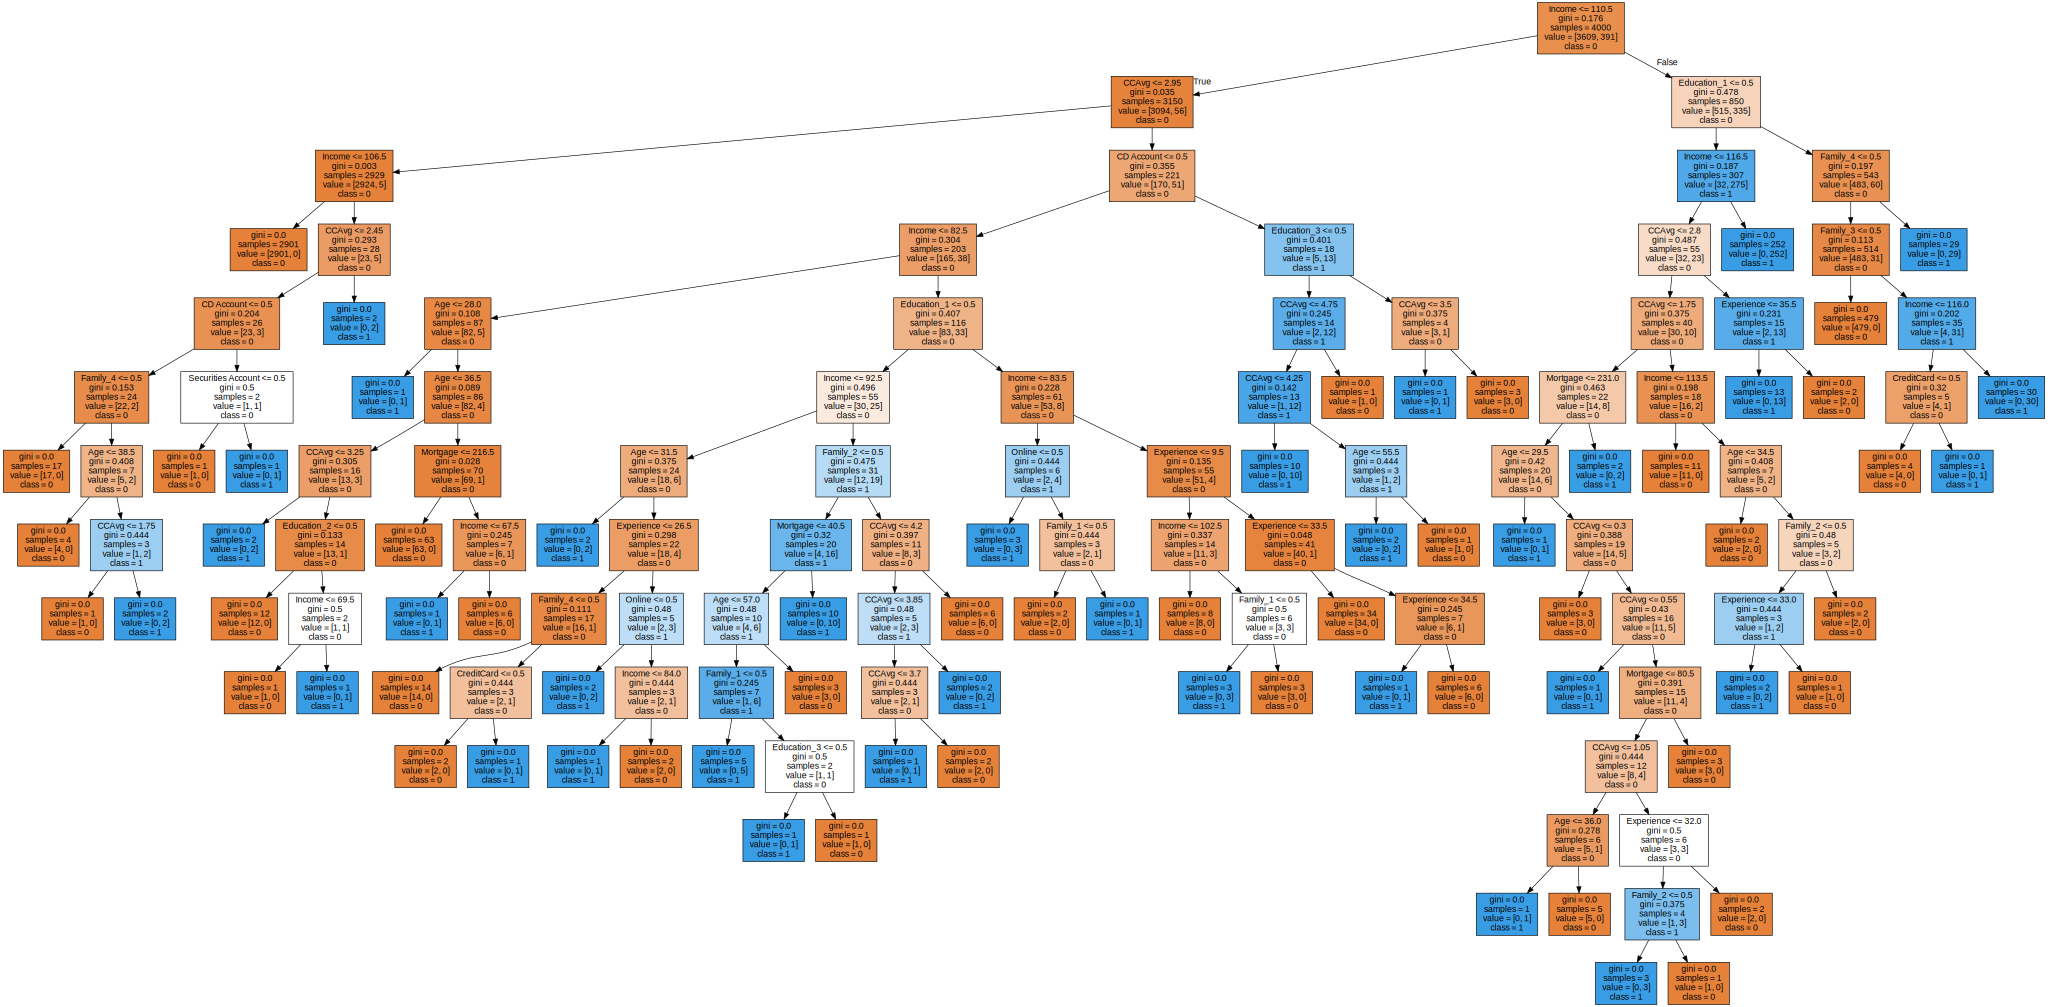

In [163]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 Jupyter Notebook 상에서 시각화
with open('tree.dot') as f:  # f란이름으로 선언
  dot_graph = f.read()
graphviz.Source(dot_graph)
# value 값이 혼잡하면 gini 높아짐
# class는 value값이 가장 높은 값 출력
# 조건 == 첫줄

In [164]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred_test = dt_clf.predict(X_test)

In [165]:
confusion_matrix(pred_test, y_test)

array([[905,   5],
       [  6,  84]])

In [166]:
accuracy_score(pred_test,y_test)

0.989

Feature importances:
[0.02  0.016 0.349 0.069 0.006 0.001 0.014 0.003 0.004 0.007 0.009 0.073
 0.071 0.351 0.001 0.005]
Age : 0.020
Experience : 0.016
Income : 0.349
CCAvg : 0.069
Mortgage : 0.006
Securities Account : 0.001
CD Account : 0.014
Online : 0.003
CreditCard : 0.004
Family_1 : 0.007
Family_2 : 0.009
Family_3 : 0.073
Family_4 : 0.071
Education_1 : 0.351
Education_2 : 0.001
Education_3 : 0.005


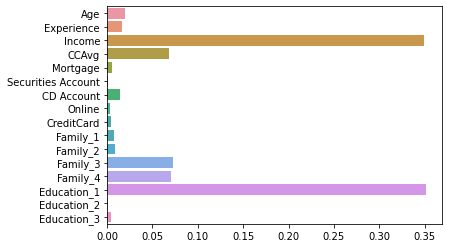

In [167]:
import seaborn as sns
import numpy as np

# feature importance 추출 <- 특성별 중요도를 출력
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 umportance 매핑
for name, value in zip(X_data.columns, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=X_data.columns)

In [169]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

dtree = DecisionTreeClassifier()

### parameter 들을 dict형태로 설정 -> 횟수 설정
parameters = {'max_depth':[2,3,4], 'min_samples_split':[2,3]}
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행
## refit=True가 defult임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score',
           'rank_test_score', 'split0_test_score',
           'split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_split': 2}",0.962751,5,0.959520,0.966992,0.961740
1,"{'max_depth': 2, 'min_samples_split': 3}",0.962751,5,0.959520,0.966992,0.961740
2,"{'max_depth': 3, 'min_samples_split': 2}",0.970501,3,0.967766,0.976744,0.966992
3,"{'max_depth': 3, 'min_samples_split': 3}",0.970501,3,0.967766,0.976744,0.966992
4,"{'max_depth': 4, 'min_samples_split': 2}",0.982251,1,0.979760,0.982746,0.984246
5,"{'max_depth': 4, 'min_samples_split': 3}",0.982251,1,0.979760,0.982746,0.984246


In [170]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

In [172]:
from sklearn.tree import export_graphviz
# export_grathviz의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성함.
export_graphviz(estimator, out_file= "best_tree.dot",
                class_names = ['0','1'], 
                feature_names = X_data.columns,
                impurity = True,
                filled = True)

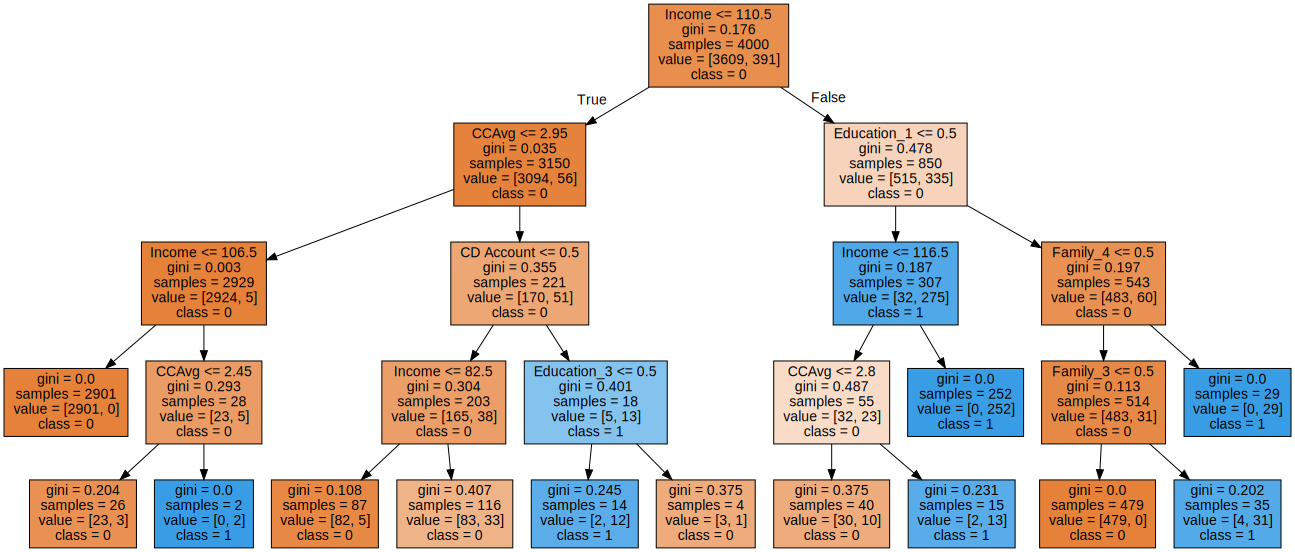

In [173]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 Jupyter Notebook 상에서 시각화
with open('best_tree.dot') as f: 
  dot_graph = f.read()
graphviz.Source(dot_graph)